In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
# Version Information
# tensorflow 2.2.0 , Cudnn7.6.5 and Cuda 10.1 , python 3.8

In [2]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [3]:
tf.test.is_built_with_cuda()

True

In [4]:
(X_train, y_train), (X_test,y_test) = tf.keras.datasets.cifar10.load_data()

In [5]:
y_train.shape

(50000, 1)

In [6]:
def plot_sample(index):
    plt.figure(figsize = (10,1))
    plt.imshow(X_train[index])

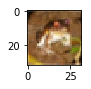

In [7]:
plot_sample(0)

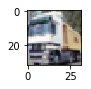

In [8]:
plot_sample(1)

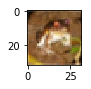

In [9]:
plot_sample(0)

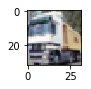

In [10]:
plot_sample(1)

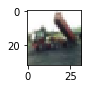

In [11]:
plot_sample(2)

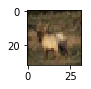

In [12]:
plot_sample(3)

In [13]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [14]:
classes[y_train[3][0]]

'deer'

In [15]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [16]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10, dtype='float32'
)
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10, dtype='float32'
)

In [17]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [18]:
y_train_categorical[0:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [19]:
model = keras.Sequential([
        keras.layers.Flatten(input_shape=(32,32,3)),
        keras.layers.Dense(3000, activation='relu'),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(10, activation='sigmoid')    
    ])

model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train_categorical, epochs=1)

1563/1563 [==============================] - 131s 84ms/step - loss: 1.8118 - accuracy: 0.3542


In [20]:
model.predict(X_test_scaled)

array([[0.38491368, 0.5674045 , 0.7314445 , ..., 0.2092008 , 0.7250974 ,
        0.2093485 ],
       [0.72062147, 0.9608619 , 0.28219688, ..., 0.18335953, 0.97143805,
        0.96510077],
       [0.8310964 , 0.8575437 , 0.4408148 , ..., 0.28959966, 0.9801063 ,
        0.845428  ],
       ...,
       [0.23711887, 0.17821375, 0.61038965, ..., 0.5922138 , 0.39043042,
        0.25701874],
       [0.24128482, 0.45016518, 0.6505308 , ..., 0.54893523, 0.42658198,
        0.36476547],
       [0.5709073 , 0.29684496, 0.7308587 , ..., 0.86724234, 0.5042764 ,
        0.31921774]], dtype=float32)

In [21]:
classes[y_test[0][0]]

'cat'

In [22]:
model.predict(X_test_scaled)[0]

array([0.38491368, 0.5674045 , 0.7314445 , 0.76345646, 0.34460986,
       0.7080388 , 0.70297766, 0.2092008 , 0.7250974 , 0.2093485 ],
      dtype=float32)

In [23]:
np.argmax(model.predict(X_test_scaled)[0])

3

In [24]:
classes[np.argmax(model.predict(X_test_scaled)[0])]

'cat'

In [25]:
model.evaluate(X_test_scaled,y_test_categorical)

313/313 [==============================] - 8s 26ms/step - loss: 1.6666 - accuracy: 0.4118


[1.6666011810302734, 0.41179999709129333]

In [26]:
def get_model():
    model = keras.Sequential([
            keras.layers.Flatten(input_shape=(32,32,3)),
            keras.layers.Dense(3000, activation='relu'),
            keras.layers.Dense(1000, activation='relu'),
            keras.layers.Dense(10, activation='sigmoid')    
        ])

    model.compile(optimizer='SGD',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [27]:
%%timeit -n1 -r1 
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)

1563/1563 [==============================] - 120s 76ms/step - loss: 1.8118 - accuracy: 0.3551
2min ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [28]:
%%timeit -n1 -r1 
with tf.device('/GPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)

1563/1563 [==============================] - 132s 84ms/step - loss: 1.8100 - accuracy: 0.3564
2min 12s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
